In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
import os
import re

from scipy import misc

from matplotlib import pyplot as plt

import numpy as np

## Буквы

In [14]:
train_input = np.empty((0, 841))
cv_input = np.empty((0, 841))
test_input = np.empty((0, 841))
train_output = np.empty((0, 26))
cv_output = np.empty((0, 26))
test_output = np.empty((0, 26))

In [15]:
for f in os.listdir('./test_data/big_alphabet_29x29/'):
    v = np.array(misc.imread('./test_data/big_alphabet_29x29/' + f, flatten=True)).flatten() / 255.0
    parts = re.split('[-\.]', f)
    i = int(parts[1])
    o = np.zeros(26)
    o[i] = 1.0
    if len(parts) == 5 and parts[2] in ['7', '8']:
        cv_input = np.vstack([cv_input, v])
        cv_output = np.vstack([cv_output, o])
    elif len(parts) == 5 and parts[2] in ['5', '6']:
        test_input = np.vstack([cv_input, v])
        test_output = np.vstack([cv_output, o])
    else:
        train_input = np.vstack([train_input, v])
        train_output = np.vstack([train_output, o])

### all in one

In [80]:
train_y = np.argmax(train_output, axis=1)
test_y = np.argmax(test_output, axis=1)
cv_y = np.argmax(cv_output, axis=1)

In [81]:
y = np.r_[train_y, test_y, cv_y]
x = np.r_[train_input, test_input, cv_input]

In [82]:
y = y.astype(np.ubyte)
x = x.astype(np.ubyte)

In [83]:
np.savez("./data/big-alphabet_29x29", x=x, y=y)

### Train test cv

In [84]:
train_data = zip(train_input.astype(np.ubyte), train_y.astype(np.ubyte))
test_data = zip(test_input.astype(np.ubyte), test_y.astype(np.ubyte))
cv_data = zip(cv_input.astype(np.ubyte), cv_y.astype(np.ubyte))

In [85]:
np.savez("./data/big-alphabet_29x29_train-test-cv",
         train=train_data,
         test=test_data,
         cv=cv_data)

In [142]:
train_data[0][1]

0

# Mnist

In [126]:
from scipy.sparse import csr_matrix

In [127]:
from src.mnist_loader import load_data

In [128]:
mnist_train, mnist_cv, mnist_test = load_data()

### all in one

In [119]:
mnist_x = np.r_[mnist_train[0], mnist_cv[0], mnist_test[0]]
mnist_y = np.r_[mnist_train[1], mnist_cv[1], mnist_test[1]]

In [117]:
mnist_x_csr = csr_matrix(mnist_x)

In [122]:
np.savez("./data/mnist_28x28", x=mnist_x_csr, y=mnist_y)

### Train test cv

In [160]:
mnist_train_data = zip(mnist_train[0], mnist_train[1])
mnist_test_data = zip(mnist_test[0], mnist_test[1])
mnist_cv_data = zip(mnist_cv[0], mnist_cv[1])

In [ ]:
np.savez("./data/mnist_28x28_train-test-cv", train=mnist_train_data, test=mnist_test_data, cv=mnist_cv_data)

# Loading example

In [162]:
big_alphabet = np.load("./data/big-alphabet_29x29_train-test-cv.npz")

In [163]:
big_alphabet.keys()

['test', 'train', 'cv']

In [165]:
big_alphabet_test_data = big_alphabet["test"]

In [174]:
t_x, t_y = big_alphabet_test_data[0]
t_y

0

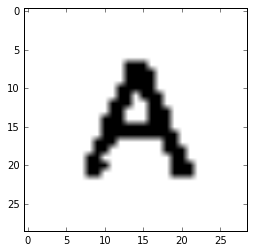

In [175]:
plt.imshow(t_x.reshape((29,29)), cmap="gray")

In [176]:
mnist = np.load("./data/mnist_28x28_train-test-cv.npz")

In [177]:
mnist.keys()

['test', 'train', 'cv']

In [183]:
mnist_test_data = mnist["test"]

In [184]:
t_x, t_y = mnist_test_data[0]
t_y

7

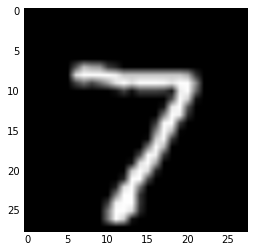

In [186]:
plt.imshow(t_x.reshape((28,28)), cmap="gray")